# MLPR Assignment 1 – Predicting Audio

## Getting started
Import NumPy and Matplotlib

In [50]:
import numpy as np
import matplotlib.pyplot as plt

Load a long array into Python

In [51]:
amp_data = np.load('amp_data.npz')['amp_data']

In [52]:
amp_data

array([ 0.00000000e+00, -3.05175781e-05,  6.10351562e-05, ...,
        9.15527344e-05, -3.05175781e-05,  0.00000000e+00])

# Qestion 1.a
Plot a line graph showing the sequence in amp_data, and a histogram of the amplitudes in this sequence. Include the code for your plots, with one to three sentences about anything you notice that might be important for modelling these data.

## The answer of 1.a

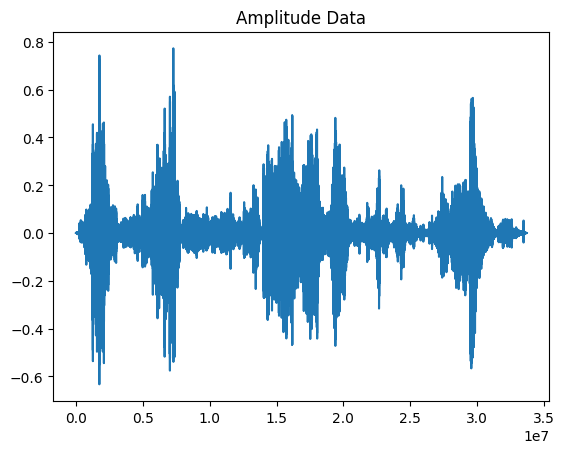

In [53]:
# The Line graph of the amplitude data
plt.plot(amp_data)
plt.title('Amplitude Data')
plt.show()

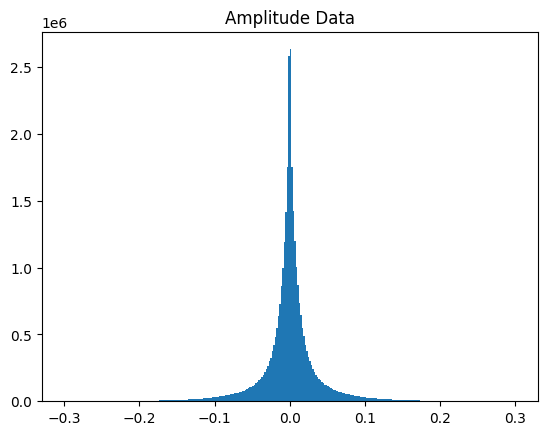

In [54]:
# The histogram of the amplitude data
plt.hist(amp_data, bins=300, range = (-0.3, 0.3))
plt.title('Amplitude Data')
plt.show()

The line graph shows a signal with frequent filuctuations seeming to be periodic. Histogram seems to form a gussian distribution with zero mean and variance less than 0.1. 

## Qestion 1.b
Include your code for creating the six arrays above from the original amp_data array. Your answers to future questions should assume these arrays exist, rather than relisting the code from this part.

## The answer of 1.b

In [55]:
# To get R, the row of Rx21 matrix
R = len(amp_data) // 21
# Discard the last few data points to make the data length a multiple of 21
new_amp_data = amp_data[:R*21]
# Reshape the data to a Rx21 matrix
matrix_ad = np.reshape(new_amp_data, (R, 21))

# Randomly shuffle the rows of the matrix
np.random.seed(42)
shuffled_matrix = np.random.permutation(matrix_ad)

# Split the shuffled matrix into training, validation, and testing sets
split_train = int(0.7 * R)
split_val = int(0.85 * R)

X_shuf_train = shuffled_matrix[:split_train, :20]
Y_shuf_train = shuffled_matrix[:split_train, 20]

X_shuf_val = shuffled_matrix[split_train:split_val, :20]
Y_shuf_val = shuffled_matrix[split_train:split_val, 20]

X_shuf_test = shuffled_matrix[split_val:, :20]
Y_shuf_test = shuffled_matrix[split_val:, 20]

## Qestion 2.a
Include the code for a plot that shows 20 training points, a test point, a straight line fit, and a quartic fit.

## The answer of 2.a

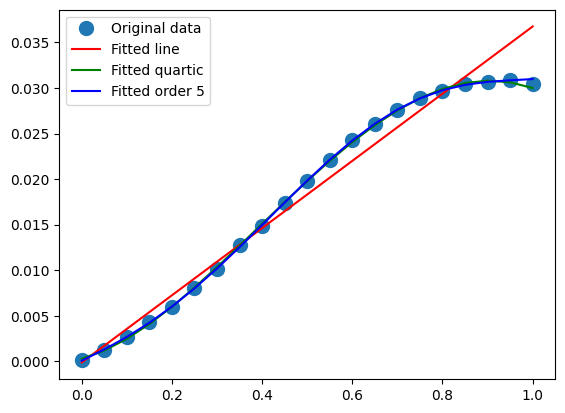

In [56]:
# pick one row of the matrix
row_sample = X_shuf_train[0]
y = Y_shuf_train[0]


# Splict [0,1] into 21 equal parts and discard the last point
t = np.linspace(0, 1, 21)
#start point
start = 0
t = t[start:]
t_train = t[:-1]

# Straight line fit
str_fit = np.vstack([np.ones(len(t_train)), t_train]).T
a1, b1 = np.linalg.lstsq(str_fit, row_sample[start:], rcond=None)[0]
line = a1 + b1 * t


# quartic fit
qua_fit = np.vstack([np.ones(len(t_train)), t_train, t_train ** 2, t_train ** 3, t_train ** 4]).T
a2, b2, c2, d2, e2 = np.linalg.lstsq(qua_fit, row_sample[start:], rcond=None)[0]
quartic = a2 + b2 * t + c2 * t ** 2 + d2 * t ** 3 + e2 * t ** 4

# order 5 fit
fif_fit = np.vstack([np.ones(len(t_train)), t_train, t_train ** 2, t_train ** 3, t_train ** 4, t_train ** 5]).T
a3, b3, c3, d3, e3, f3 = np.linalg.lstsq(fif_fit, row_sample[start:], rcond=None)[0]
fifth = a3 + b3 * t + c3 * t ** 2 + d3 * t ** 3 + e3 * t ** 4 + f3 * t ** 5

plt.plot(t, np.append(row_sample[start:],y) , 'o', label='Original data', markersize=10)
plt.plot(t, line, 'r', label='Fitted line')
plt.plot(t, quartic, 'g', label='Fitted quartic')
plt.plot(t, fifth, 'b', label='Fitted order 5')
# print y and predicted y
plt.legend()
plt.show()




## Qestion 2.b
Explain why the linear fit might be better if we use only the most recent two points, at times $t = \frac{18}{20}$ and $t = \frac{19}{20}$ , rather than all 20 points. Also explain why the quartic fit might be better with a longer context than is best for the straight line model.

## The answer of 2.b

# Qestion 2.c
Based on your manual visualization of this snippet of audio data, and maybe one or two other rows of your training dataset, roughly what order of polynomial and context length do you guess might be best for prediction and why?



# The answer of 2.c

# Qestion 3.a

# The answer of 3.a

$v = \Phi (((\Phi^T\Phi)^{-1})^T\phi(t=1))$

# Qestion 3.bi

In [57]:

def Phi(C, K):
    # Generate the time steps
    t = np.linspace((19 - C + 1)/20, 19/20, C)

    # Create the design matrix with C rows and K columns
    phi = np.zeros((C, K))
    for k in range(K):
        # Fill in the k-th column of phi
        phi[:, k] = t**k 
    
    return phi


# Qestion 3.bii

In [58]:
def make_vv(C, K):
    # phi function
    phi = Phi(C, K)

    # the product of phi transpose and phi
    product = np.dot(phi.T, phi)

    # the inverse of the product
    inverse = np.linalg.inv(product)

    # the transpose of the inverse of the product
    inverse_t = inverse.T
    
    # the basis vector with time = 1
    basis = np.ones(K)
    
    # the v vector
    v = phi @ inverse_t @ basis

    return v.reshape(C, 1)


# Qestion 3.biii

In [59]:
C = 10
K = 4
x = X_shuf_train[0, 20 - C:20]
phi = Phi(C, K)
w = np.linalg.inv(phi.T @ phi) @ phi.T @ x
basis = np.ones(K)
v = make_vv(C, K)


In [60]:
# set C and K to random values
C = np.random.randint(0,20)
K = np.random.randint(0, 10)
# set x to the first row of the training set
x = X_shuf_train[0, 20 - C:20]
# calculate phi
phi = Phi(C, K)
# calculate w
w = np.linalg.inv(phi.T @ phi) @ phi.T @ x
basis = np.ones(K)
v = make_vv(C, K)
f1 = np.dot(w.T, basis)
f2 = np.dot(v.T, x)
print(np.isclose(f1, f2), f1, f2)

[ True] 0.030555725097684998 [0.03055573]


In [61]:
f1 = np.dot(w.T, basis)

In [62]:
f1

0.030555725097684998

In [63]:
f2 = np.dot(v.T, x)

In [64]:
f2

array([0.03055573])

# Question 3.c

In [65]:
len_train = len(Y_shuf_train)

In [66]:
# find the best K and C to minimize the sum of squared errors
best_se = float('inf')
best_K = 0
best_C = 0
for K in range(1, 8):
    for C in range(1, 21):
        v = make_vv(C, K)
        predict_train = X_shuf_train[:, 20 - C:20] @ v
        predict_train = predict_train.reshape(len_train)
        se = np.sum((predict_train - Y_shuf_train) ** 2)
        # check if the new se is better than the best se
        if se < best_se:
            best_se = se
            best_K = K
            best_C = C
print(best_K, best_C, best_se)


2 2 15.465414167369802


In [67]:
best_K, best_C

(2, 2)

In [68]:
best_se

15.465414167369802

# Question 3.cii

In [69]:
# calculate the mse for the training, validation, and testing sets
len_test = len(Y_shuf_test)
len_val = len(Y_shuf_val)

# use best_C and best_K to calculate the mse
v_best = make_vv(best_C, best_K) 

# calculate the mse for the training, validation, and testing sets
predict_train = X_shuf_train[:, 20 - best_C:20] @ v_best
predict_train = predict_train.reshape(len_train) 

predict_val = X_shuf_val[:, 20 - best_C:20] @ v_best
predict_val = predict_val.reshape(len_val)

predict_test = X_shuf_test[:, 20 - best_C:20] @ v_best
predict_test = predict_test.reshape(len_test)

mse_train = np.mean((predict_train - Y_shuf_train) ** 2)
mse_val = np.mean((predict_val - Y_shuf_val) ** 2)
mse_test = np.mean((predict_test - Y_shuf_test) ** 2)

print(mse_train, mse_val, mse_test)

1.3762020126243957e-05 1.3000225007146922e-05 1.2965968796745447e-05


In [70]:
mse_train, mse_val, mse_test

(1.3762020126243957e-05, 1.3000225007146922e-05, 1.2965968796745447e-05)

# Qestion 4

In [71]:
best_mse4 = float('inf')
best_C4 = 0

for C in range(1, 21):
    X = X_shuf_train[:, 20 - C:20]
    y = Y_shuf_train.reshape(len_train, 1)
    v = np.linalg.lstsq(X, y, rcond=None)[0].reshape(1, C)
    predict = v @ X.T
    mse = np.mean((Y_shuf_train - predict)**2)
    if mse < best_mse4:
        best_mse4 = mse
        best_C4 = C

print(best_mse4, best_C4)



7.882336452747402e-06 20


In [72]:
best_C4, best_mse4

(20, 7.882336452747402e-06)

In [73]:
best_mse4_val = float('inf')
best_C4_val = 0

for C in range(1, 21):
    X = X_shuf_val[:, 20 - C:20]
    y = Y_shuf_val.reshape(len_val, 1)
    v = np.linalg.lstsq(X, y, rcond=None)[0].reshape(1, C)
    predict = v @ X.T
    mse = np.mean((Y_shuf_val - predict)**2)
    if mse < best_mse4_val:
        best_mse4_val = mse
        best_C4_val = C

print(best_mse4_val, best_C4_val)

7.477360774957253e-06 20


In [74]:

X4_val = X_shuf_val[:, 20 - best_C4:20]
y4_val = Y_shuf_val.reshape(len_val, 1)
v4_val = np.linalg.lstsq(X4_val, y4_val, rcond=None)[0].reshape(1, best_C4)
predict4_val = v4_val @ X4_val.T
mse4_val = np.mean((Y_shuf_val - predict4_val)**2)

X4_test = X_shuf_test[:, 20 - best_C4:20]
y4_test = Y_shuf_test.reshape(len_test, 1)
v4_test = np.linalg.lstsq(X4_test, y4_test, rcond=None)[0].reshape(1, best_C4)
predict4_test = v4_test @ X4_test.T
mse4_test = np.mean((Y_shuf_test - predict4_test)**2)

best_mse4, mse4_val, mse4_test


(7.882336452747402e-06, 7.477360774957253e-06, 7.24274196586695e-06)

In [75]:
# compare with the best mse from the previous model
predict_test1 = X_shuf_test[:, 20 - 2:20] @ v_best
predict_test1 = predict_test.reshape(len_test)
mse_test1 = np.mean((predict_test - Y_shuf_test) ** 2)

X4_test = X_shuf_test[:, 0:20]
y4_test = Y_shuf_test.reshape(len_test, 1)
v4_test = np.linalg.lstsq(X4_test, y4_test, rcond=None)[0].reshape(1, best_C4)
predict_test2 = v4_test @ X4_test.T
mse_test2 = np.mean((Y_shuf_test - predict_test2)**2)

print('The mse of model in Q3 is ', mse_test1)
print('The mse of model in Q4 is ', mse_test2)

The mse of model in Q3 is  1.2965968796745447e-05
The mse of model in Q4 is  7.24274196586695e-06
